## Обезличивание исходных данных и подготовка нескольких примеров
Исходные данные имеют значения для имени БД в формате SID_имя_сервера, что может быть расценено как конфиденциальная инфомация, поэтому заменяю на рандомные uuid'ы.

In [30]:
import numpy as np
import pandas as pd
import uuid
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import os
print(os.listdir("./input"))

['sample.csv', 'tablespace_data.csv', 'tablespace_original.csv']


In [53]:
tablespace_original = pd.read_csv("./input/tablespace_original.csv", sep='\t', decimal=',')

In [54]:
tablespace_original.rename(columns={"ROLLUP_TIMESTAMP": "rollup_timestamp", "DATABASE": "database"}, inplace=True)
tablespace_original['rollup_timestamp'] = pd.to_datetime(tablespace_original['rollup_timestamp'])
tablespace_original = tablespace_original.set_index('rollup_timestamp')

In [55]:
uuids = [str(uuid.uuid4()) for x in range(len(tablespace_original['database'].drop_duplicates()))]

In [56]:
deperson_map = dict(zip(tablespace_original['database'].drop_duplicates(), uuids))

In [61]:
tablespace_data = tablespace_original.copy()
tablespace_data['database'] = tablespace_data['database'].map(deperson_map)
tablespace_data = tablespace_data.sort_values(by=['rollup_timestamp'])

In [62]:
tablespace_data.head(20)

,database,TARGET_GUID,USED_SIZE_GB,ALLOCATED_SIZE_GB
rollup_timestamp,,,,
2018-01-05,9518240b-5c1b-4655-b75b-346dbb57511e,6F0ED56E5D991B5BBFBBB0A9C59F0983,4.278,9.884
2018-01-05,fb033ceb-becd-4e0f-b714-87c0932d143a,8C54FC665FE1C7BBD661EE7867D46C8A,56.688,820.225
2018-01-05,cc346803-9ff3-4683-986d-d00a24c2db3b,6B44C02C8B0FD5CC09E6D88FADEDBA1F,3659.174,7156.820
2018-01-05,cd256c90-5801-4dc6-874f-a182e36e8282,94B269FAF7D299F3ADD894D1E65278B5,72.727,84.749
2018-01-05,297a7723-1fd5-44f5-a2ee-08b8afbcda12,470F3C4B67DF6AD7E053C3C2440AF5FC,645.830,839.622
2018-01-05,9b9173c0-f30b-45bb-a9e5-09c686dafc25,E7EE54B029C6C379A9A900D3785099A8,10346.757,11152.392
2018-01-05,6ee39ab6-5fde-4946-8e80-f319bbdd04ab,2D422A06B21EA33A2B6F76211B6343E8,7.980,27.703
2018-01-05,2949c32c-0331-48e9-a0db-8d74924a828b,5632D3BE6DFF0D913172A740B500808F,28.716,1028.633
2018-01-05,293d06c8-c5b6-4a74-91c3-4458f12ae4a9,35701D03A36B22A5D2704FC95587503D,13.961,28.732


In [63]:
tablespace_data.to_csv('./input/tablespace_data.csv', sep='\t')

## Подбор интересных примеров для анализа

In [26]:
sample1 = tablespace_data[tablespace_data['database'] ==  '694b4493-b62c-48ce-9dc8-6d2d95b33581']

In [27]:
sample1.head()

,database,TARGET_GUID,USED_SIZE_GB,ALLOCATED_SIZE_GB
rollup_timestamp,,,,
2018-01-05,694b4493-b62c-48ce-9dc8-6d2d95b33581,6F0ED56E5D991B5BBFBBB0A9C59F0983,4.278,9.884
2018-01-06,694b4493-b62c-48ce-9dc8-6d2d95b33581,6F0ED56E5D991B5BBFBBB0A9C59F0983,4.328,9.884
2018-01-07,694b4493-b62c-48ce-9dc8-6d2d95b33581,6F0ED56E5D991B5BBFBBB0A9C59F0983,4.394,9.952
2018-01-08,694b4493-b62c-48ce-9dc8-6d2d95b33581,6F0ED56E5D991B5BBFBBB0A9C59F0983,4.462,10.021
2018-01-09,694b4493-b62c-48ce-9dc8-6d2d95b33581,6F0ED56E5D991B5BBFBBB0A9C59F0983,4.533,10.089


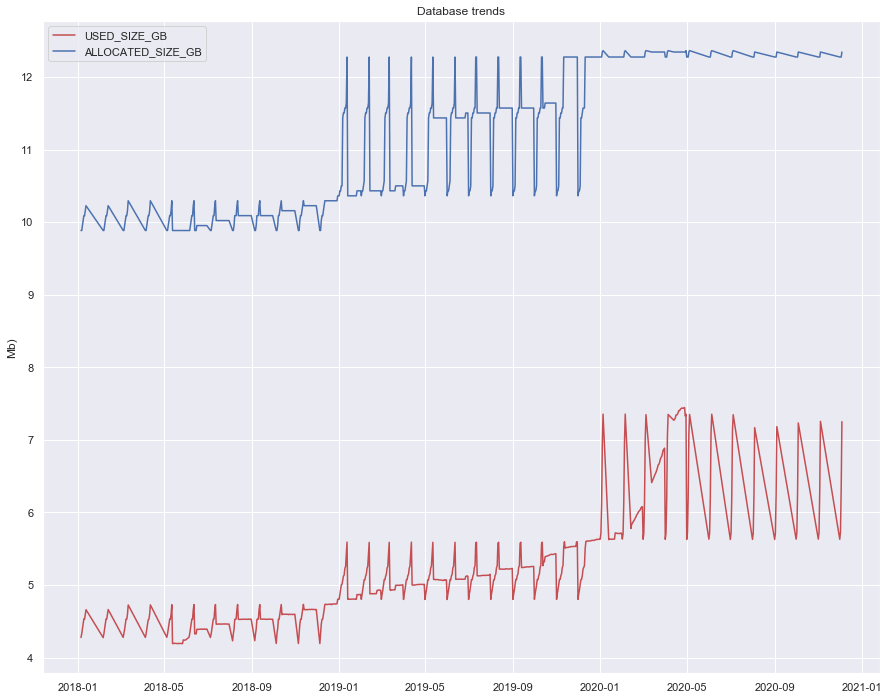

In [33]:
plt.figure(figsize=(15, 12))
plt.plot(sample1.index, sample1['USED_SIZE_GB'], 'r-', label = 'USED_SIZE_GB')
plt.plot(sample1.index, sample1['ALLOCATED_SIZE_GB'], 'b-', label = 'ALLOCATED_SIZE_GB')
plt.title('Database trends')
plt.ylabel('Mb)');
plt.legend();
plt.show()